## Implementation Of Regression ML

In [ ]:
file = r''
target = ''

In [17]:
# Parameters
file = "Breast cancer.csv"
target = "qvalue"


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv(rf'{file}')



# print(types)
#Exploratory Data analysis¶




### Automated Cleaning

In [19]:
df_clean = dabl.clean(df)[::10]
df_clean

,gene,transcript,score,pvalue,qvalue,info
0,CDH1,ENST00000261769,0.021,0.8248,0.9915,oncogene
10,RUNX1,ENST00000300305,0.075,0.2058,0.8136,oncogene
20,SF3B1,ENST00000335508,0.671,0.0000,0.0000,oncogene
30,FANCD2,ENST00000287647,0.048,0.4281,0.9036,oncogene
40,MED23,ENST00000368068,0.087,0.1482,0.7928,oncogene
...,...,...,...,...,...,...
43750,IGHV1-69,ENST00000390633,0.011,0.9995,1.0000,oncogene
43760,KIAA0125,ENST00000429431,0.011,0.9995,1.0000,oncogene
43770,TMEM212,ENST00000334567,0.010,0.9997,1.0000,oncogene
43780,C22orf29,ENST00000405640,0.009,0.9999,1.0000,oncogene


### Types detected in the input csv

In [20]:
#type of data
types = dabl.detect_types(df_clean)
print(f'Detected types in the csv: {types}')

Detected types in the csv:             continuous  dirty_float  low_card_int  categorical   date  \
gene             False        False         False        False  False   
transcript       False        False         False        False  False   
score             True        False         False        False  False   
pvalue            True        False         False        False  False   
qvalue            True        False         False        False  False   
info             False        False         False         True  False   

            free_string  useless  
gene               True    False  
transcript         True    False  
score             False    False  
pvalue            False    False  
qvalue            False    False  
info              False    False  


### EDA 

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=3.62E+04'}, xlabel='score', ylabel='qvalue'>,
         <AxesSubplot:title={'center':'F=3.46E+04'}, xlabel='pvalue'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=3.09E-01'}, xlabel='qvalue', ylabel='info'>]],
       dtype=object)]

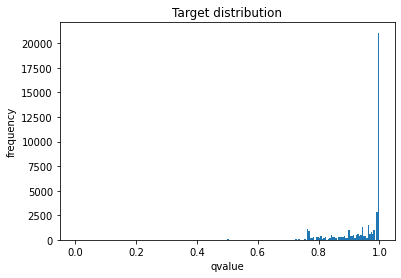

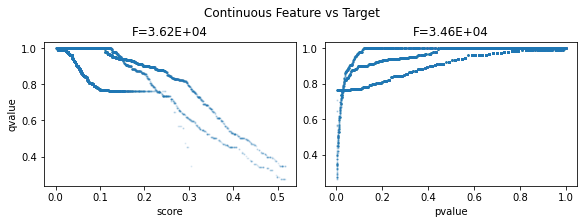

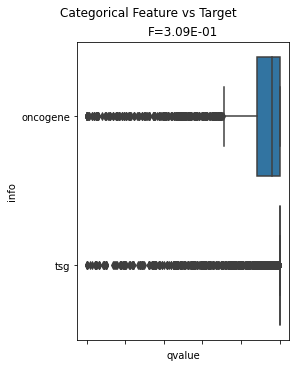

In [21]:
dabl.plot(df, target_col=target)

## ML Regression model

In [9]:
x = df.drop(target, axis=1)
y =df[target]
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)

#split data
x_train.shape,x_test.shape,y_train.shape,y_test.shape

#Run model
from flaml import AutoML
automl = AutoML()
automl.fit(x_train, y_train, task="regression")

[flaml.automl: 10-29 13:00:14] {1459} INFO - Data split method: uniform
[flaml.automl: 10-29 13:00:14] {1463} INFO - Evaluation method: holdout
[flaml.automl: 10-29 13:00:14] {1511} INFO - Minimizing error metric: 1-r2
[flaml.automl: 10-29 13:00:14] {1548} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree']
[flaml.automl: 10-29 13:00:14] {1778} INFO - iteration 0, current learner lgbm
[flaml.automl: 10-29 13:00:15] {1895} INFO - Estimated sufficient time budget=3890s. Estimated necessary time budget=4s.
[flaml.automl: 10-29 13:00:15] {1967} INFO -  at 0.6s,	estimator lgbm's best error=0.6668,	best estimator lgbm's best error=0.6668
[flaml.automl: 10-29 13:00:15] {1778} INFO - iteration 1, current learner lgbm
[flaml.automl: 10-29 13:00:15] {1967} INFO -  at 1.0s,	estimator lgbm's best error=0.6668,	best estimator lgbm's best error=0.6668
[flaml.automl: 10-29 13:00:15] {1778} INFO - iteration 2, current learner lgbm
[flaml.automl: 10-29 13:00:15] {1967} INF

### Best model

In [15]:
# Export the best model
automl.model

### Prediction on test data

In [16]:
y_test_predict = automl.predict(x_test)
y_test_predict

array(['oncogene', 'oncogene', 'tsg', ..., 'tsg', 'oncogene', 'oncogene'],
      dtype=object)

### Statistics and Plotting

In [13]:
# r2_score
from sklearn.metrics import r2_score
r2_y_test = r2_score(y_test, y_test_predict)
print(r2_y_test)

ValueError: could not convert string to float: 'tsg'

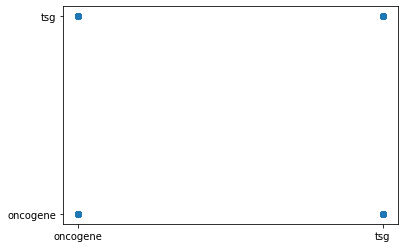

In [14]:
# Visulization
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df =()
# Split data into training and test splits
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
df = 'train'
df = 'test'
plt.scatter(y_test, y_test_predict)
plt.show()